# Визуализация и кросс-валидация

## Визуализация

## Кросс-валидация и подбор параметров
    
https://knowledgepit.fedcsis.org/login/index.php

![](http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg)

# Визуализация

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

figsize(14,6)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('./hs_data_train.csv')

### Хотим посмотреть:
    1. Что вообще представляют из себя признаки, их статистические характеристики
    2. Совместную корреляцию
    3. Как признаки и их пары влияют на таргет

In [7]:
# статистические характеристики
# как мы видим - все признаки числовые
data.describe() #data[feature].describe()

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,...,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,...,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000
mean,3.001524e+06,0.504702,8.935080,0.279386,0.247516,627.390064,21.220902,0.069124,0.17387,6.933652,...,5.905942,7.33132,3.372132,1.066686,0.170024,4.608842,2.351210,13.64603,18.748198,15.494122
std,1.154866e+06,0.499978,4.588388,1.070245,0.904131,353.216942,8.380295,0.253665,0.55706,3.093027,...,5.752130,7.09297,1.582740,0.999628,0.438735,1.732399,2.394439,6.70419,7.767939,7.622276
min,1.000009e+06,0.000000,1.000000,0.000000,0.000000,25.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.001232e+06,0.000000,5.000000,0.000000,0.000000,390.000000,15.000000,0.000000,0.00000,5.000000,...,1.000000,1.00000,2.000000,0.000000,0.000000,4.000000,0.000000,9.00000,13.000000,10.000000
50%,3.002342e+06,1.000000,9.000000,0.000000,0.000000,612.000000,24.000000,0.000000,0.00000,8.000000,...,5.000000,6.00000,3.000000,1.000000,0.000000,5.000000,2.000000,13.00000,19.000000,15.000000
75%,4.000338e+06,1.000000,12.000000,0.000000,0.000000,798.000000,29.000000,0.000000,0.00000,10.000000,...,9.000000,11.00000,4.000000,2.000000,0.000000,6.000000,4.000000,18.00000,24.000000,20.000000
max,4.999998e+06,1.000000,30.000000,21.000000,7.000000,1235.000000,30.000000,1.000000,4.00000,10.000000,...,45.000000,54.00000,10.000000,7.000000,4.000000,10.000000,10.000000,49.00000,54.000000,55.000000


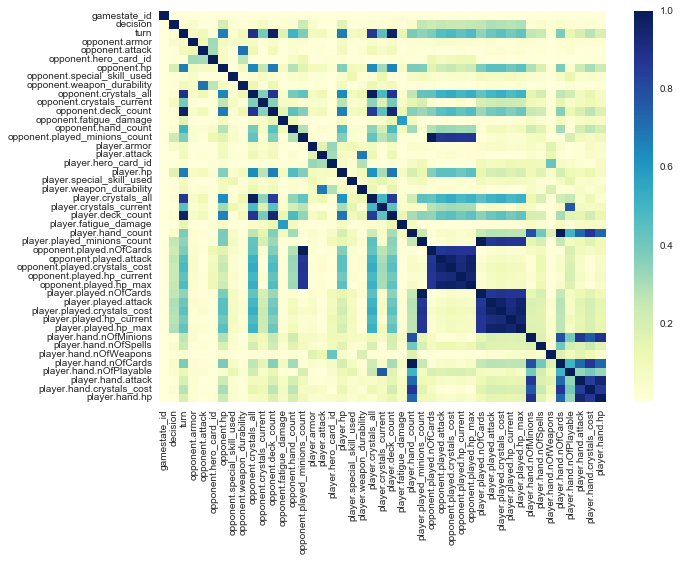

In [8]:
def get_corr(data):
    corr = data.corr().abs()
    plt.figure(figsize=(10,7))
    sns.heatmap(corr, cmap="YlGnBu")
    plt.show()
get_corr(data)

Когда смотрим данные надо делать **ВЫВОДЫ**
    1. Параметры карт на поле оппонента(игорка) очень коррелируют
    2. Параметры карт в своей руке коррелируют
    3. с decision(это целевая переменная) коррелируют сильнее всего хп(свое и оппонента) а так же карты на поле

In [11]:
def plot_hist_discrete(data, target, column):
    #sns.factorplot(x = target, y = column, hue="smoker", data=tips, kind="bar");
    bins = data[column].nunique()
    plt.hist([data[data[target] == 1.0][column], data[data[target] == 0.0][column]], color=['g','r'], 
             alpha=0.5, bins=bins)
    plt.title(column)

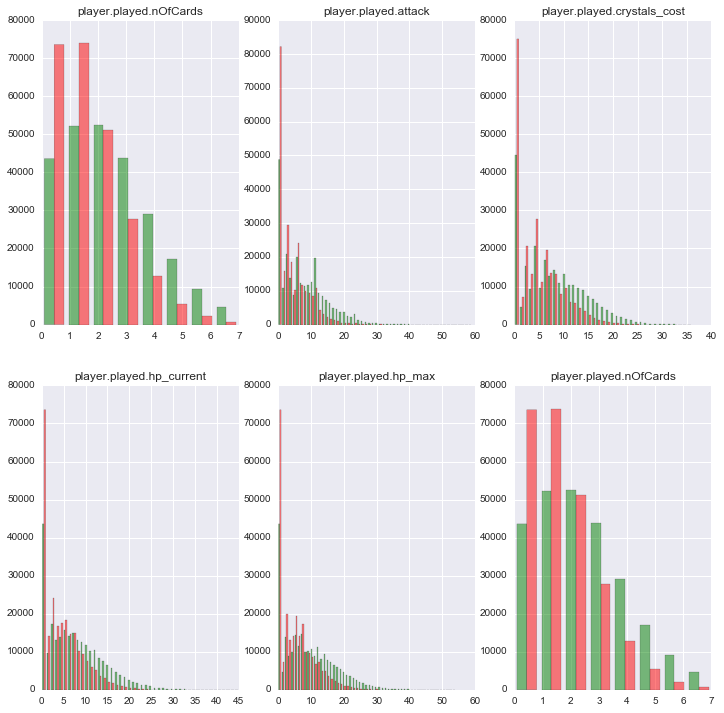

In [13]:
figsize(12,12)
subplot(2,3,1)
plot_hist_discrete(data, 'decision', 'player.played.nOfCards')

subplot(2,3,2)
plot_hist_discrete(data, 'decision', 'player.played.attack')

subplot(2,3,3)
plot_hist_discrete(data, 'decision', 'player.played.crystals_cost')

subplot(2,3,4)
plot_hist_discrete(data, 'decision', 'player.played.hp_current')

subplot(2,3,5)
plot_hist_discrete(data, 'decision', 'player.played.hp_max')

subplot(2,3,6)
plot_hist_discrete(data, 'decision', 'player.played.nOfCards')

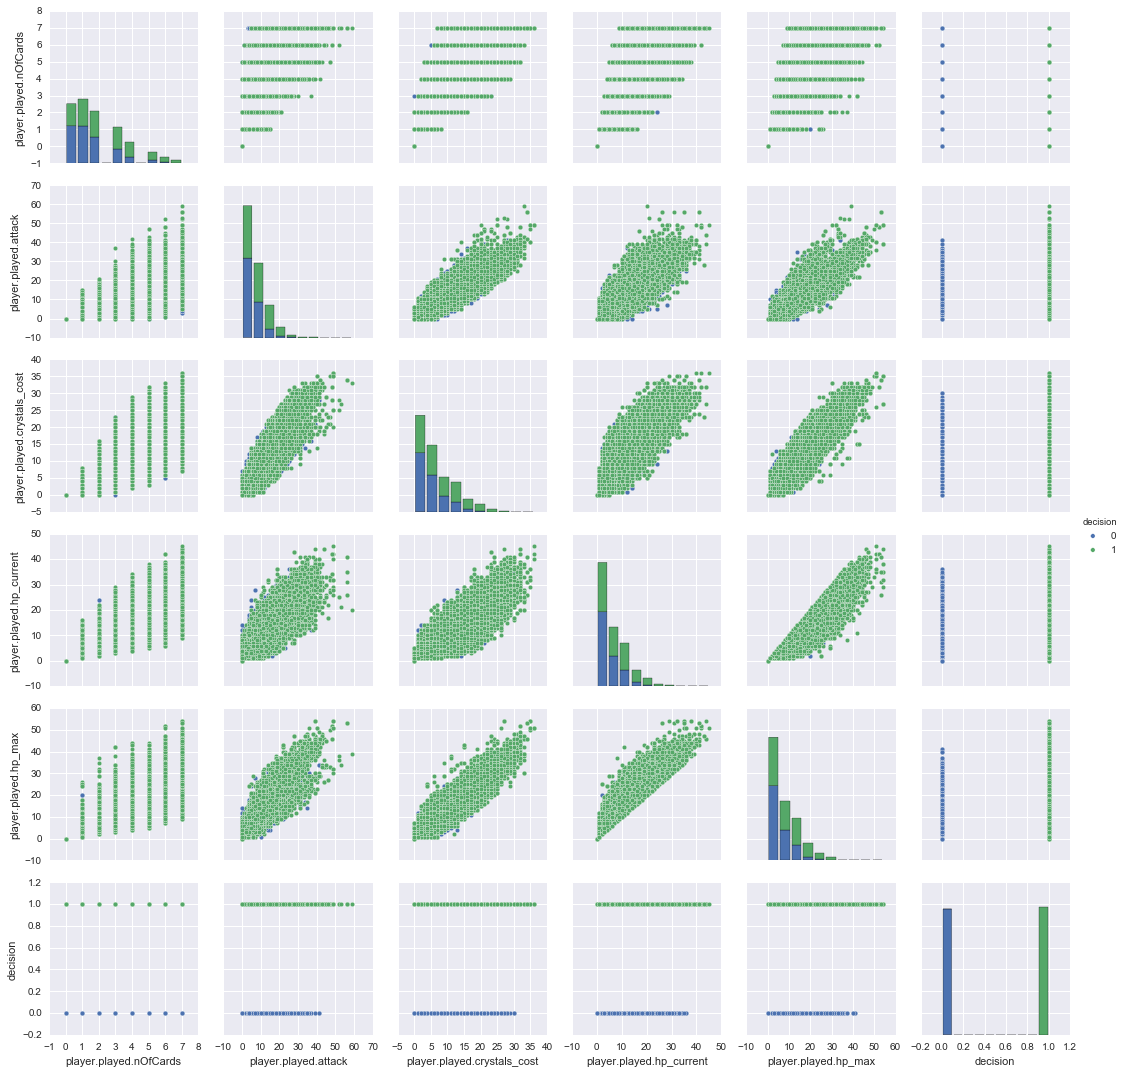

In [3]:
# ! осторожно ! Ресурсоемкое и может убить ядро!  Запускайте не на всех признаках и сначала на маленьких данных
cols_pair = ['player.played.nOfCards','player.played.attack',
             'player.played.crystals_cost','player.played.hp_current',
             'player.played.hp_max','decision']
g = sns.pairplot(data[cols_pair], hue="decision")
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)

    ну что ж, убедились - в нашем случае pairplot работает не очень
    Посмотрим еще на один интересный график!

In [11]:
def plot_violin_hist(data, target, column):
    plt.figure(figsize=(12, 8))
    plt.subplot(1,2,1)
    sns.violinplot(x = target, y = column, data = data)
    plt.subplot(1,2,2)
    sns.distplot(data[data[target] == 1.0][column], color = 'green')
    sns.distplot(data[data[target] == 0.0][column], color = 'red')

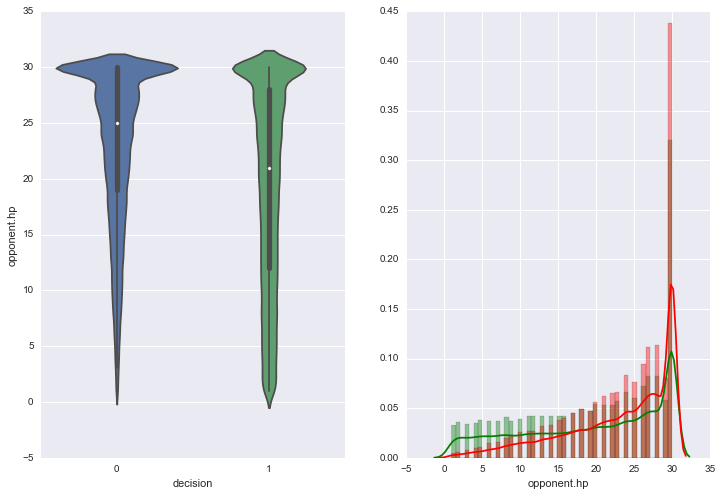

In [12]:
# тут значений больше, поэтому более осмысленный график
plot_violin_hist(data, 'decision', 'opponent.hp')

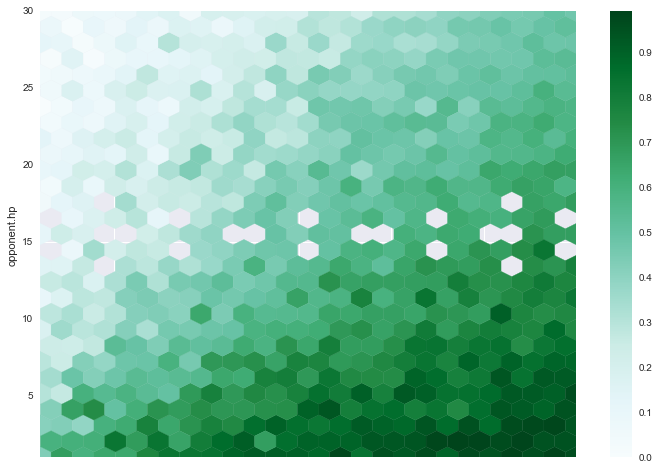

In [17]:
figsize(12,8)
df = data[['player.hp','opponent.hp','decision']]
df.plot.hexbin(x='player.hp', y='opponent.hp', C='decision', reduce_C_function=np.mean, gridsize=25)

Много интересных и сложных визуализаций https://www.kaggle.com/philschmidt/quora-question-pairs/quora-interactive-eda-model-selection/notebook

# Кросс-Валидация

In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold # Стратифицированные фолды ВСЕГДА лучше!

![](http://www.mdpi.com/sensors/sensors-12-12489/article_deploy/html/images/sensors-12-12489f7-1024.png)

In [26]:
# сначала сделаем холдаут
data_folds, data_holdout = train_test_split(data, random_state=10, 
                                            test_size=0.2, stratify=data.decision)
# рассказать как переобучился на mlbootcamp =) и вообще зачем нужен холдаут

In [28]:
skf = list(StratifiedKFold(n_splits=5, shuffle=True, random_state=10).split(data_folds.drop('decision',1), data_folds.decision))

In [29]:
# получилось примерно следующее
skf

[(array([     0,      1,      2, ..., 399996, 399998, 399999]),
  array([     5,     14,     18, ..., 399986, 399987, 399997])),
 (array([     2,      3,      4, ..., 399993, 399995, 399997]),
  array([     0,      1,      9, ..., 399996, 399998, 399999])),
 (array([     0,      1,      2, ..., 399997, 399998, 399999]),
  array([     4,     15,     17, ..., 399989, 399990, 399992])),
 (array([     0,      1,      4, ..., 399997, 399998, 399999]),
  array([     2,      3,      6, ..., 399979, 399988, 399995])),
 (array([     0,      1,      2, ..., 399997, 399998, 399999]),
  array([    10,     11,     16, ..., 399971, 399981, 399993]))]

In [ ]:
# получаем нужную подтавблицу 
fold = skf[0]
train = data.iloc[fold[0]]
test = data.iloc[fold[1]]

# Подбор параметров

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight': np.linspace(3,15,13).astype(int)
}


gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
    min_child_weight=7, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test1, scoring='neg_log_loss',iid=False, cv=skf, verbose=3)

gsearch1.fit(data_folds.drop('decision',1), data_folds.decision)

In [ ]:
param_test1 = {
    'gamma':[i/10.0 for i in range(0,10)]
}


gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
    min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test1, scoring='neg_log_loss',iid=False, cv=skf, verbose=3)

gsearch1.fit(data.drop('target',1), data.target)

In [ ]:
param_test1 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}


gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
    min_child_weight=7, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test1, scoring='neg_log_loss',iid=False, cv=skf, verbose=3)

gsearch1.fit(data.drop('target',1), data.target)

In [ ]:
param_test1 = {
    'subsample':[i/100.0 for i in range(75,85,3)],
    'colsample_bytree':[i/100.0 for i in range(55,75,3)]
}


gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
    min_child_weight=7, gamma=0.3, subsample=0.9, colsample_bytree=0.7,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test1, scoring='neg_log_loss',iid=False, cv=skf, verbose=3)

gsearch1.fit(data.drop('target',1), data.target)

In [ ]:
param_test1 = {
    'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}


gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
    min_child_weight=7, gamma=0.3, subsample=0.8, colsample_bytree=0.6,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
    param_grid = param_test1, scoring='neg_log_loss',iid=False, cv=skf, verbose=3)

gsearch1.fit(data.drop('target',1), data.target)

In [ ]:
param_test1 = {
    'reg_alpha':[i/10.0 for i in range(20)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=140, max_depth=3,
    min_child_weight=7, gamma=0.3, subsample=0.85, colsample_bytree=0.84,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, reg_alpha=0.9), 
    param_grid = param_test1, scoring='neg_log_loss',iid=False, cv=skf, verbose=3)

gsearch1.fit(data.drop('target',1), data.target)

## После того, как оценили параметры уже можно подбирать **eta** или число итераций

In [32]:
import xgboost as xgb
xgb_param = {}
xgb_param['objective'] = 'binary:logistic'
xgb_param['eta'] = 0.3
xgb_param['max_depth'] = 5
xgb_param['nthread'] = 3
xgb_param['eval_metric'] = 'auc'

num_round = 500
xgb_matrix = xgb.DMatrix(data_folds.drop('decision',1), data_folds.decision)

In [33]:
cvresult = xgb.cv(
    xgb_param,
    xgb_matrix,
    num_boost_round=num_round,
    folds=skf,
    verbose_eval=20,
    early_stopping_rounds=50
)

[0]	train-auc:0.743759+0.000197122	test-auc:0.742803+0.000901086
[20]	train-auc:0.794132+0.000451932	test-auc:0.790523+0.000938499
[40]	train-auc:0.804796+0.000377899	test-auc:0.798875+0.000753443
[60]	train-auc:0.811804+0.000159391	test-auc:0.803871+0.000638007
[80]	train-auc:0.81697+0.000246767	test-auc:0.807383+0.00054776
[100]	train-auc:0.821502+0.000282348	test-auc:0.810142+0.000499172
[120]	train-auc:0.825382+0.0004098	test-auc:0.812584+0.000493808


KeyboardInterrupt: 

In [ ]:
# киллер-фича!
def get_smoothed_likelihood(series, value, target, alpha=20):
    globalmean = target.mean()
    nrows = (series == value).sum()
    mean_target = target[series == value].mean()
    smoothed_likelihood = (mean_target*nrows + globalmean*alpha) / (nrows + alpha)
    return smoothed_likelihood